# Optimization of Telecom Project Using Random Forest

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
#import the dataset
df = pd.read_csv('../customer_churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
features = ['gender_code', 'SeniorCitizen_code', 'PhoneService_code', 'MultipleLines_code', 
                 'InternetService_code', 'Partner_code', 'Dependents_code', 'PaymentMethod_code', 
                 'PaymentMethod_code', 'PaperlessBilling_code','Contract_code', 'StreamingMovies_code',
                 'StreamingTV_code', 'TechSupport_code', 'DeviceProtection_code', 'OnlineBackup_code',
                 'OnlineSecurity_code', 'Dependents_code', 'Partner_code','tenure', 'MonthlyCharges']
#X = np.array(df[features])
#y = np.array(df['Churn_code'])

In [35]:
#drop columns that are not object type
df_object = list(df.dtypes[df.dtypes == object].index)
df[df_object].head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [38]:
df_obj = df[df_object].drop(df[['customerID','TotalCharges']], axis='columns')
df_obj.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [52]:
features = ['Partner','Dependents','PhoneService', 'MultipleLines', 
                 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod','Churn']

In [56]:
#change from index to code
#pd.factorize(df[['Partner','Dependents']])

In [170]:
df_factorized = []
#df_factorized = pd.DataFrame()
for n in np.arange(len(features)):
    #print(n)
    fac = list(pd.factorize(df_obj[features[n]]))[0]
    #print(fac.shape)
    #df_factorized.append(fac)
    #df_factorized = pd.concat([df_factorized, fac])
#df_factorized

In [99]:
#pd.DataFrame(fac)

In [103]:
df_fac = df_obj.apply(lambda x: pd.factorize(x)[0])
df_fac.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1


In [105]:
df_fac2 = df_fac.drop(['gender','Partner'], axis='columns')
df_fac2.head()

,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,1,1,1,0,1,0,0,0,0,0,0,0,1


In [219]:
#concatenate with the other numeric values
df_new = pd.concat([df_fac2, df[['SeniorCitizen','MonthlyCharges','TotalCharges','tenure']]],axis='columns')
df_new.head()

,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,MonthlyCharges,TotalCharges,tenure
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,1
1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,0,56.95,1889.5,34
2,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,53.85,108.15,2
3,0,0,0,0,1,1,1,1,0,0,1,1,2,0,0,42.30,1840.75,45
4,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,2


In [220]:
#groupby churn and find the mean
df_group = df_new.groupby('Churn').mean()
df_group

,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,MonthlyCharges,tenure
Churn,,,,,,,,,,,,,,,,
0,0.344801,0.901044,1.310978,0.893893,0.879397,0.904716,0.908968,0.881330,0.912060,0.916119,0.889254,0.464438,1.497101,0.128721,61.265124,37.569965
1,0.174425,0.909042,1.363831,0.814874,0.278759,0.780631,0.412520,0.286784,0.556447,0.558587,0.140182,0.250936,0.813269,0.254682,74.441332,17.979133


It is observed from the above mean grouping that the following features(columns) shows a significant variation on 'Churn'; 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBiling', 'PaymentMethod','tenure' and 'MonthlyCharges' thus are the cause of customers churn out. 

#### The features above will be taken as the independent variables while the 'Churn' will be the dependent variable

In [221]:
X = df_new.drop(['PhoneService','MultipleLines','InternetService','SeniorCitizen','TotalCharges','Churn'], axis='columns')
y = df_new['Churn']

In [117]:
#import randomtrees regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [222]:
model = RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1)

In [224]:
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [124]:
#df_new.dtypes

In [225]:
model.oob_score_

0.2099848787269044

In [226]:
y_oob = model.oob_prediction_
print("c_stat value is ", roc_auc_score(y, y_oob))

c_stat value is  0.8048730295921307


In [169]:
#y_oob.reshape(-1,7043)

In [165]:
#[max(n) for n in np.arange(1,100) if 100 % n == 0]

In [166]:

#for n in np.arange(2,7043):
    #if 7043 % n == 0:
        #print(n)
    #else:
        #return "No factors"
    

In [227]:
list(model.feature_importances_)

[0.027054032119685593,
 0.03873249437217154,
 0.02345273876630288,
 0.02213726630086082,
 0.026072977496608394,
 0.01448134429425313,
 0.016510034934264887,
 0.1697903880928014,
 0.031019872400370033,
 0.05687024453594899,
 0.35884146521369925,
 0.21503714147303313]

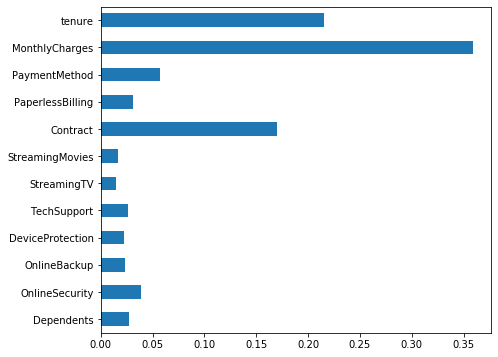

In [242]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False)
feature_importances.plot(kind="barh",figsize=(7,6))

The most important clear features are 'MonthlyCharges','Contract','tenure' and 'PaymentMethod'. These will be reused as the independent variables in building the next model

In [229]:
X_ = df_new[['PaymentMethod','Contract','MonthlyCharges','tenure']]

In [196]:
#train and split the model
from sklearn.model_selection import train_test_split

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [239]:
model_ = RandomForestRegressor(n_estimators=500, n_jobs=-1) 

In [240]:
model_.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [241]:
model_.score(X_test,y_test)

0.1807932407625762

#### n_estimator optimization

30 trees
C-stat : 0.7889270404374013
 
50 trees
C-stat : 0.7993374184583036
 
100 trees
C-stat : 0.8065220120440041
 
200 trees
C-stat : 0.809149050185694
 
500 trees
C-stat : 0.8115267141155007
 
1000 trees
C-stat : 0.8122850743820762
 
2000 trees
C-stat : 0.8125651614867356
 


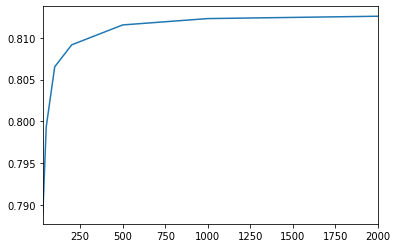

In [248]:
results = []
n_estimator_options = [30,50,100,200,500,1000,2000]
for trees in n_estimator_options:
    model_ = RandomForestRegressor(trees, n_jobs=-1, oob_score=True, random_state=42)
    model_.fit(X,y)
    print(trees, "trees")
    roc = roc_auc_score(y, model_.oob_prediction_)
    print('C-stat :', roc)
    results.append(roc)
    print(" ")
pd.Series(results, n_estimator_options).plot()

#### max_features optimization

auto option
C-stat : 0.8122850743820762
 
None option
C-stat : 0.8122850743820762
 
sqrt option
C-stat : 0.8142810504760706
 
log2 option
C-stat : 0.8142810504760706
 
0.9 option
C-stat : 0.8135746539422221
 
0.2 option
C-stat : 0.8124050304616056
 


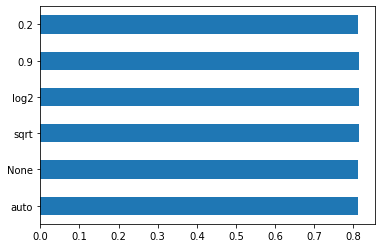

In [252]:
results_max = []
max_features_options = ["auto",None,"sqrt","log2",0.9,0.2]
for max_features in max_features_options:
    model_max = RandomForestRegressor(1000, n_jobs=1, oob_score=True,max_features=max_features, random_state=42)
    model_max.fit(X,y)
    print(max_features, "option")
    roc = roc_auc_score(y, model_max.oob_prediction_)
    print('C-stat :', roc)
    results_max.append(roc)
    print(" ")
pd.Series(results_max, max_features_options).plot(kind="barh")

#### min_sample_leaf optimization

1 min samples
C-stat : 0.8122850743820762
 
2 min samples
C-stat : 0.8228914151363477
 
3 min samples
C-stat : 0.827826470294428
 
4 min samples
C-stat : 0.8318323311830171
 
5 min samples
C-stat : 0.8344128863438898
 
6 min samples
C-stat : 0.8355584151981872
 
7 min samples
C-stat : 0.8366927240226321
 
8 min samples
C-stat : 0.8375179391214622
 
9 min samples
C-stat : 0.8384485294315344
 
10 min samples
C-stat : 0.8389545165842381
 


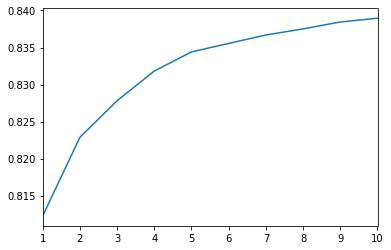

In [256]:
results_min = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]
for min_samples in min_samples_leaf_options:
    model_min = RandomForestRegressor(1000,n_jobs=-1,
                                   oob_score=True,
                                   random_state=42,
                                   max_features ="auto",
                                   min_samples_leaf=min_samples)
    model_min.fit(X,y)
    print(min_samples, "min samples")
    roc = roc_auc_score(y, model_min.oob_prediction_)
    print('C-stat :', roc)
    results_min.append(roc)
    print(" ")
pd.Series(results_min, min_samples_leaf_options).plot()

#### Final Modelling

In [259]:
model_final = RandomForestRegressor(n_estimators=1000,
                                       oob_score=True,
                                       n_jobs=-1,
                                       max_features="sqrt",
                                       min_samples_leaf=10,
                                       random_state=42)

In [260]:
model_final.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [263]:
roc = roc_auc_score(y,model_final.oob_prediction_)
print("C-stat: ",roc)

C-stat:  0.8448490135577256


#### Hence our model's accuracy has been optimized from 80% to 84%